# Preprocessing Data

In [1]:
#Importing the required libraries

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical # The labels can be converted int to 0s and 1s
import numpy as np # for matrix mathematics
import matplotlib.pyplot as plt # To plt the graphs

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
print("x_train :", x_train.shape)
print("y_train :", y_train.shape)
print("x_test :", x_test.shape)
print("y_test :", y_test.shape)

x_train : (60000, 28, 28)
y_train : (60000,)
x_test : (10000, 28, 28)
y_test : (10000,)


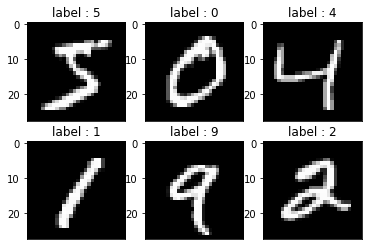

In [4]:
fig = plt.figure()

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(x_train[i], cmap = "gray", interpolation = 'none')
    plt.title("label : {a}".format(a = y_train[i]))
    plt.xticks([])
fig.show()

In [5]:
#Converting the data to float type and later reshaping it into 1 dimension
x_train = x_train.astype('float')
x_test = x_test.astype('float')

In [6]:
#Reshaping from 2D(28 x 28) to 1D(784) because the input layer requiers every pixel value
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [7]:
#By normalizing we mean that the pixel values are scaled between 0 and 1(they are actually between 0 and 255 and we are rescaling them)
x_train = tf.keras.utils.normalize(x_train)
x_test = tf.keras.utils.normalize(x_test)

In [8]:
NUM_CLASSES = 10

y_train = to_categorical(y_train, num_classes = NUM_CLASSES)
y_test = to_categorical(y_test, num_classes = NUM_CLASSES)
print(y_train[0])

# Creating Model

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [10]:
model = Sequential()

In [11]:
# Creating model architecture
model.add(Dense(256, input_shape = (784,)))
model.add(Activation('relu'))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
activation (Activation)      (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
__________________________________________________

In [13]:
model.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Training Model

In [14]:
EPOCHS = 50
BATCH_SIZE = 128

In [15]:
history = model.fit(x = x_train,
                    y = y_train,
                    batch_size = BATCH_SIZE,
                    epochs = EPOCHS,
                    validation_split = 0.2,
                    shuffle = True)

Epoch 1/50
375/375 [==============================] - 4s 3ms/step - loss: 2.2809 - accuracy: 0.2731 - val_loss: 2.2556 - val_accuracy: 0.4397
Epoch 2/50
375/375 [==============================] - 1s 3ms/step - loss: 2.2265 - accuracy: 0.4971 - val_loss: 2.1897 - val_accuracy: 0.5634
Epoch 3/50
375/375 [==============================] - 1s 3ms/step - loss: 2.1416 - accuracy: 0.5813 - val_loss: 2.0782 - val_accuracy: 0.6232
Epoch 4/50
375/375 [==============================] - 1s 3ms/step - loss: 1.9961 - accuracy: 0.6214 - val_loss: 1.8887 - val_accuracy: 0.6455
Epoch 5/50
375/375 [==============================] - 1s 3ms/step - loss: 1.7651 - accuracy: 0.6428 - val_loss: 1.6136 - val_accuracy: 0.6824
Epoch 6/50
375/375 [==============================] - 1s 3ms/step - loss: 1.4795 - accuracy: 0.6838 - val_loss: 1.3209 - val_accuracy: 0.7145
Epoch 7/50
375/375 [==============================] - 1s 3ms/step - loss: 1.2172 - accuracy: 0.7224 - val_loss: 1.0827 - val_accuracy: 0.7588
Epoch 

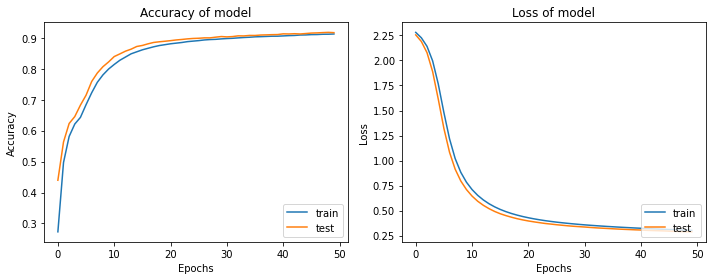

In [17]:
fig = plt.figure(figsize = (10, 4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy of model")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(['train', 'test'], loc = 'lower right')

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Loss of model")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(['train', 'test'], loc = 'lower right')

plt.tight_layout()

fig.show()

# Saving and Loading Model

In [18]:
filepath = "/content/drive/MyDrive/Deep_Learning/MNIST/saved_model/mnist_model_v1.h5"

In [19]:
model.save(filepath = filepath)

In [20]:
model_loaded = tf.keras.models.load_model(filepath = filepath)

In [21]:
model_loaded.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
activation (Activation)      (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
__________________________________________________

In [22]:
model_json = model.to_json()

In [24]:
with open("/content/drive/MyDrive/Deep_Learning/MNIST/saved_model/mnist_model_arch_v1.json", "w") as json_file:
    json_file.write(model_json)

In [25]:
model.save_weights(filepath = "/content/drive/MyDrive/Deep_Learning/MNIST/saved_model/mnist_model_weights.h5")

# Making Predictions

In [27]:
predictions = model.predict(x_test)

In [28]:
predictions

array([[5.1387262e-05, 3.0266119e-08, 3.6901936e-05, ..., 9.9759895e-01,
        1.3050280e-05, 1.5195791e-03],
       [4.2162673e-03, 2.2274260e-04, 9.3888175e-01, ..., 2.4268527e-08,
        3.6715523e-03, 1.3745662e-07],
       [1.6384863e-08, 9.9428165e-01, 2.8012348e-03, ..., 3.9652456e-04,
        7.4192852e-04, 4.7088659e-05],
       ...,
       [6.4007367e-07, 2.0868429e-05, 4.7151629e-05, ..., 1.6092112e-03,
        1.2134742e-02, 5.2855991e-02],
       [9.3247031e-04, 3.2579156e-03, 5.2795530e-04, ..., 2.3831148e-04,
        1.6860081e-01, 5.2567857e-04],
       [8.4883487e-04, 5.4055675e-08, 3.2803491e-03, ..., 3.2563250e-08,
        2.8081844e-05, 1.8315205e-06]], dtype=float32)

In [29]:
predictions[0]

array([5.1387262e-05, 3.0266119e-08, 3.6901936e-05, 7.5273385e-04,
       8.8642338e-07, 2.6412066e-05, 7.8015111e-10, 9.9759895e-01,
       1.3050280e-05, 1.5195791e-03], dtype=float32)

In [30]:
np.round(predictions[0], 1)

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [31]:
predicted_value = np.argmax(predictions[0])

In [32]:
predicted_value

7